# Import

We import necessary classes to help us in analysing the dataset.

In [1]:
# Handle table-like data and matrices :
import numpy as np
import pandas as pd

# Convert data 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

#evaluation metrics :
from sklearn import metrics

# Read Dataset

We read the dataset and check how many rows and columns does the dataset contains.

In [2]:
df=pd.read_csv("diamonds.csv", index_col=None, header=0,names=['Quantity', 'Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Price', 'X', 'Y', 'Z'])
df.shape

(53940, 11)

Here we check how the data will looks like 

In [3]:
df.head()

,Quantity,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Transform string to integer

We change string to integer for Cut, Color and Clarity.

In [4]:
label_Cut = LabelEncoder()
label_Color = LabelEncoder()
label_Clarity = LabelEncoder()


df['Cut'] = label_Cut.fit_transform(df['Cut'])
df['Color'] = label_Color.fit_transform(df['Color'])
df['Clarity'] = label_Clarity.fit_transform(df['Clarity'])

# Drop column

We drop the first column, Quantity because we already have index for the quantity.

In [5]:
df.drop(['Quantity'], axis=1, inplace=True)
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Now, we drop the three columns, Clarity, Color and Cut, which we will not be using in analysing the data.

Now, we drop the last three columns which we will not be using in analysing the data.

In [6]:
df.drop(['X','Y','Z'], axis=1, inplace=True)
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
2,0.23,1,1,4,56.9,65.0,327
3,0.29,3,5,5,62.4,58.0,334
4,0.31,1,6,3,63.3,58.0,335


Since there might be duplicate data in the dataset, we have to drop them out and reset the index.

In [7]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

We check again with our dataset to see how many rows and columns are left after cleaning the data. The pervious dataset before cleaning contains 53940 rows and 11 columns.

In [8]:
df.shape

(53137, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53137 entries, 0 to 53136
Data columns (total 7 columns):
Carat      53137 non-null float64
Cut        53137 non-null int64
Color      53137 non-null int64
Clarity    53137 non-null int64
Depth      53137 non-null float64
Table      53137 non-null float64
Price      53137 non-null int64
dtypes: float64(3), int64(4)
memory usage: 2.8 MB


In [10]:
df.describe()

,Carat,Cut,Color,Clarity,Depth,Table,Price
count,53137.000000,53137.000000,53137.000000,53137.000000,53137.000000,53137.000000,53137.000000
mean,0.802930,2.556637,2.601125,3.828707,61.745185,57.471263,3967.827258
std,0.473626,1.030528,1.702963,1.724935,1.436319,2.237208,3998.021972
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,967.000000
50%,0.710000,2.000000,3.000000,4.000000,61.800000,57.000000,2451.000000
75%,1.050000,3.000000,4.000000,5.000000,62.500000,59.000000,5376.000000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000


# Visualisation

In [11]:
df_top20price = df.nlargest(20,'Price')
df_lowest20price = df.nsmallest(20,'Price')

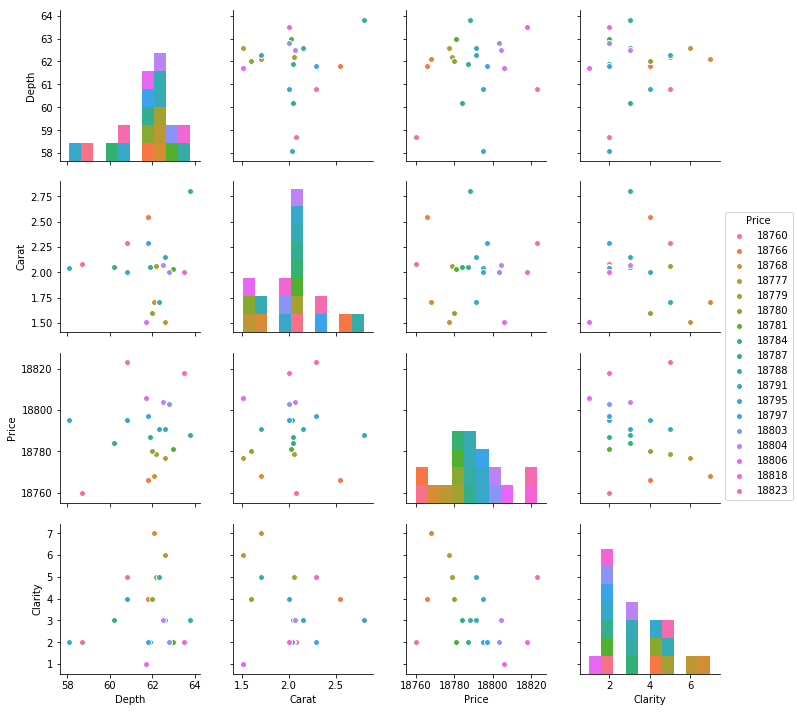

In [12]:
sns.pairplot(df_top20price[["Depth","Carat","Price","Clarity"]], hue="Price")

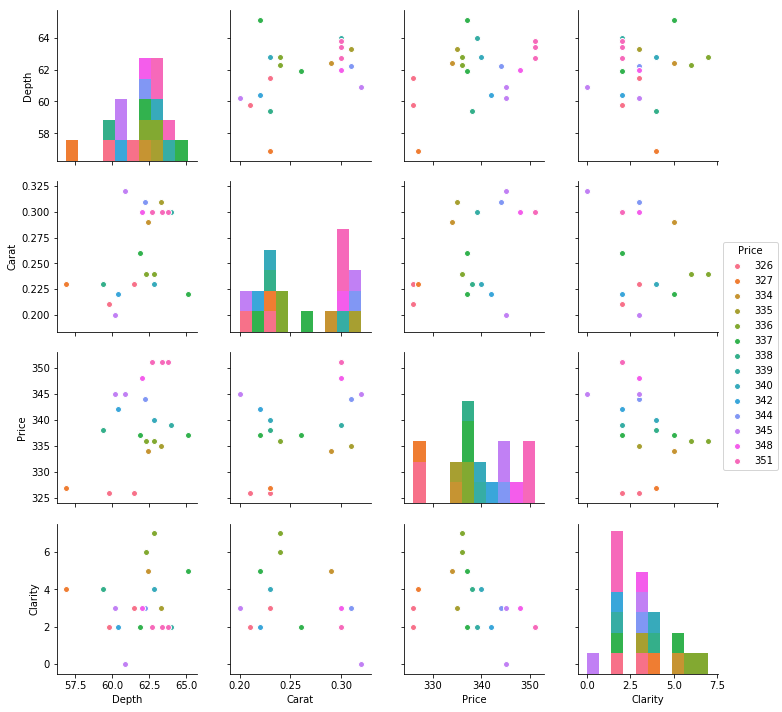

In [13]:
sns.pairplot(df_lowest20price[["Depth","Carat","Price","Clarity"]], hue="Price")

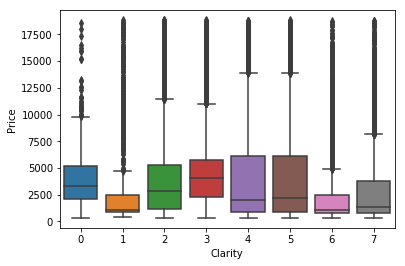

In [14]:
sns.boxplot(x='Clarity', y='Price', data=df )

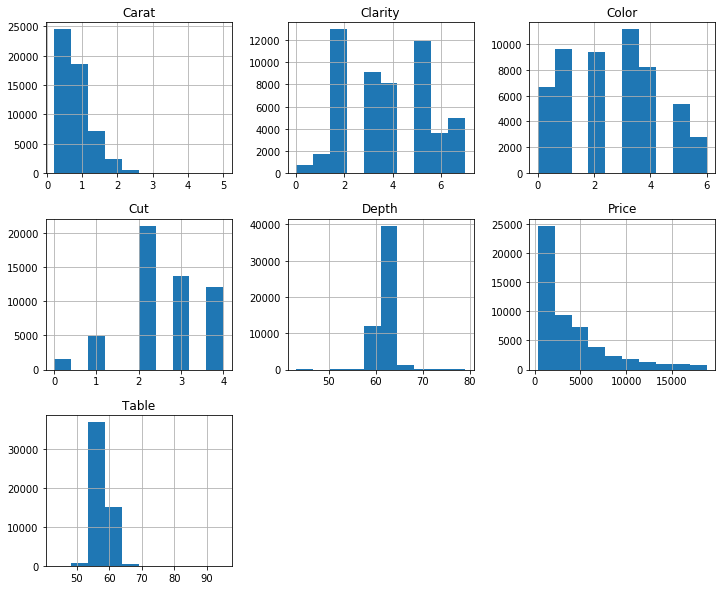

In [15]:
df.hist(figsize=(12,10))
plt.show()

# depth vs price

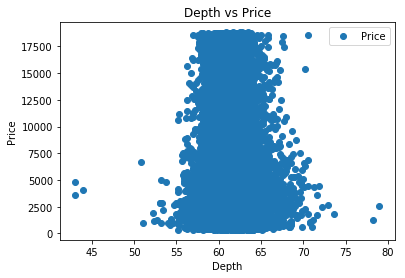

In [16]:
df.plot(x='Depth',y='Price',style='o')
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

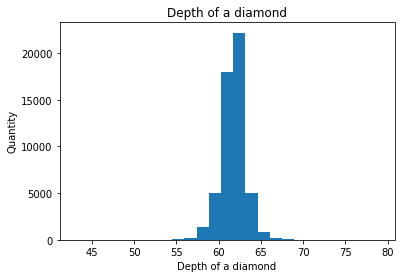

In [17]:
plt.hist('Depth' , data=df , bins=25)
plt.title('Depth of a diamond')
plt.xlabel('Depth of a diamond')
plt.ylabel('Quantity')
plt.show()

# carat vs price

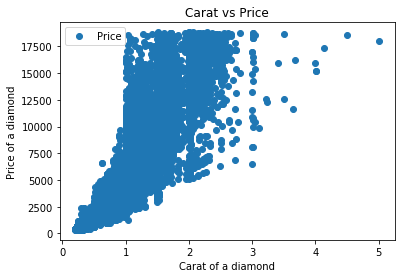

In [18]:
df.plot(x='Carat', y='Price', style='o')  
plt.title('Carat vs Price')  
plt.xlabel('Carat of a diamond')  
plt.ylabel('Price of a diamond')  
plt.show()

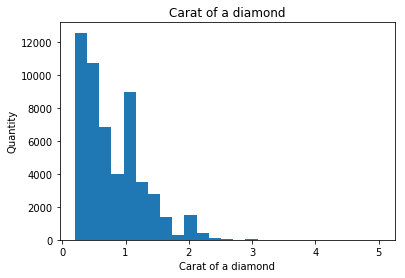

In [19]:
plt.hist('Carat' , data=df , bins=25)
plt.title('Carat of a diamond')
plt.xlabel('Carat of a diamond')
plt.ylabel('Quantity')
plt.show()

# Cut vs Price

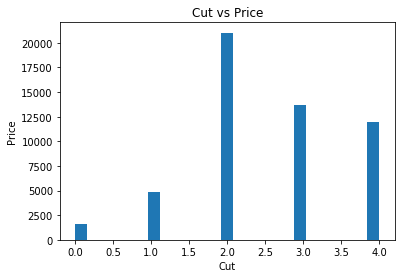

In [20]:
plt.hist('Cut', data=df, bins=25)
plt.title('Cut vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

# ML MODEL

We use Linear Regression Mehtod to train and fit the data

In [21]:
X = df.drop(['Price'], axis=1)
y = df['Price']
#80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [22]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Carat,8364.695633
Cut,70.248900
Color,-259.344602
Clarity,304.837719
Depth,-109.054376
Table,-95.065465


In [24]:
y_pred = regressor.predict(X_test)

Using regressor model to prediction.

In [25]:
df_regressor = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df_regressor)

       Actual     Predicted
16777    6741   6230.491348
39480    1116   -617.023296
25482   14543  17592.269560
44196    1632   3388.954421
45515    1753   1702.018761
22952   11127   9878.931050
30520     743   -336.274185
27674     652  -1400.129210
4891     3730   5807.749669
262      2791   3265.128154
3176     3345   3603.827222
36776     982   1240.803303
2084     3114   4061.485628
17475    7080   9068.433852
89        554  -1397.995557
34221     874   -874.497701
10903    4909   5692.178316
39345    1107   1189.066918
35965     945   -214.209934
7126     4183   4555.807408
6441     4059   4051.560868
39365    1110     40.103508
31580     776    152.074058
43796    1600   1934.961355
43050    1439   1648.811554
50056    2310   2792.704319
3986     3520   4957.542288
21686    9896   7874.338458
8662      586  -1574.034442
25023   13769  15197.816980
...       ...           ...
46878    1882   2751.506784
43142    1449   2516.047111
41671    1304    949.490008
36103     950   1005

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 953.9158354956312
Mean Squared Error: 1989481.9684763795
Root Mean Squared Error: 1410.489974610376


We use Decision Tree Classifier Mehtod to train and fit the data. Then make prediction from the model.

In [27]:
model_dtc = DecisionTreeClassifier() 
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test) 

In [28]:
df_dtc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df_dtc)

       Actual  Predicted
16777    6741       5224
39480    1116       1044
25482   14543      16278
44196    1632       2282
45515    1753       1415
22952   11127       9896
30520     743        579
27674     652        837
4891     3730       4963
262      2791       2523
3176     3345       3323
36776     982       1050
2084     3114       3183
17475    7080       7333
89        554        554
34221     874       1122
10903    4909       4751
39345    1107        863
35965     945        737
7126     4183       3750
6441     4059       3841
39365    1110        964
31580     776        776
43796    1600       1636
43050    1439       1389
50056    2310       1998
3986     3520       3584
21686    9896      10076
8662      586        650
25023   13769      13844
...       ...        ...
46878    1882       1787
43142    1449       1338
41671    1304       1170
36103     950       1124
28879     690        720
34292     876        656
32680     815        828
41979    1336       1636


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 446.58035378246143
Mean Squared Error: 970648.5592773805
Root Mean Squared Error: 985.2149812489558


We use KNN Mehtod to train and fit the data. Then make prediciton from the model. We test test the KNN from range 1 to 20 to find the lowest possible error to use for KNN regression.

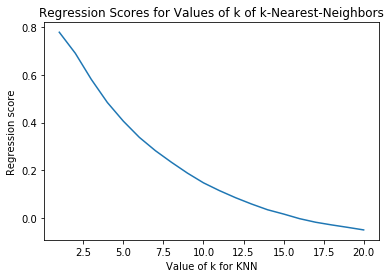

In [30]:
k_range = list(range(1,21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.r2_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Regression score')
plt.title('Regression Scores for Values of k of k-Nearest-Neighbors')
plt.show()

We select 16, the lowest regression score for our KNN value, taken from the graph above.

In [31]:
model_knn = KNeighborsClassifier(16)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test) 

In [32]:
df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df_knn)

       Actual  Predicted
16777    6741       2831
39480    1116        891
25482   14543       2845
44196    1632        666
45515    1753        552
22952   11127       5860
30520     743        720
27674     652        695
4891     3730       4986
262      2791       1389
3176     3345       2352
36776     982        878
2084     3114       1401
17475    7080       1625
89        554        432
34221     874        550
10903    4909       4304
39345    1107        802
35965     945        608
7126     4183        776
6441     4059       2215
39365    1110        477
31580     776        802
43796    1600        491
43050    1439        471
50056    2310       2160
3986     3520       1071
21686    9896       2879
8662      586        607
25023   13769       9189
...       ...        ...
46878    1882        829
43142    1449        574
41671    1304       1155
36103     950        713
28879     690       4466
34292     876        574
32680     815        840
41979    1336        698


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2558.505175009409
Mean Squared Error: 16403734.262608204
Root Mean Squared Error: 4050.1523752333324


# Correlation Map

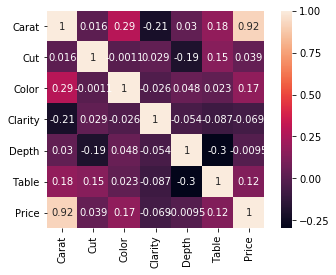

In [34]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

# Conclusion

1. Depth is inversely related to Price.

This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.

2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

3. The Weight (Carat) of a diamond has the most significant impact on its Price.

Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.